In [7]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv('housing_prices.csv')

# Check the data
print(data.head())

# Preprocess the data
X = data.drop('Price', axis=1)
y = data['Price']

# One-hot encode the categorical 'Location' column and standardize numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Bedrooms', 'Bathrooms', 'SquareFootage', 'Age']),
        ('cat', OneHotEncoder(), ['Location'])
    ])

X_preprocessed = preprocessor.fit_transform(X)

# Normalize the target variable
y = y / 1e5  # Scaling down the price for better model performance

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


   Bedrooms  Bathrooms  SquareFootage  Location  Age   Price
0         3          2           1500     Urban   10  300000
1         4          3           2000  Suburban    5  400000
2         2          1            800     Rural   20  150000
3         3          2           1600     Urban   12  310000
4         4          3           2200  Suburban    8  420000


In [8]:
# Build the feedforward neural network model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))  # Output layer for regression (predicting prices)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2, batch_size=8)


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 11.7793 - val_loss: 23.4476
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 11.2251 - val_loss: 22.5869
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 10.7179 - val_loss: 21.7326
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 10.2978 - val_loss: 20.9692
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 9.9498 - val_loss: 20.2661
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 9.6451 - val_loss: 19.5916
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 9.3703 - val_loss: 18.9222
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - loss: 9.0976 - val_loss: 18.2944
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 8.8299 - val_loss: 17.6748
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 8.5722 - val_loss: 17.0435
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 8.3168 - val_loss: 16.4184
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 

In [10]:
# Evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=2)
test_mse = model.evaluate(X_test, y_test, verbose=2)
print(f'Train MSE: {train_mse * 1e5 ** 2}') 
print(f'Test MSE: {test_mse * 1e5 ** 2}')    


1/1 - 0s - 33ms/step - loss: 0.3508
1/1 - 0s - 36ms/step - loss: 0.1030
Train MSE: 3507857918.739319
Test MSE: 1030295714.7359848


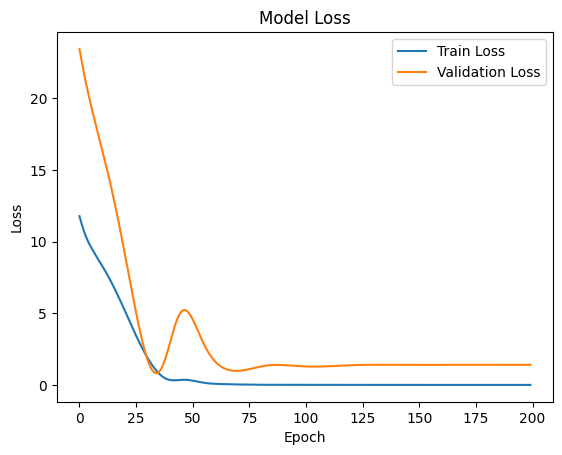

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
